# Information Extraction from PDF Documents

In this assignment you have to convert a set of PDFs to raw text and extract information from the files using regular expressions.

Download the folders containing PDF files provided via Moodle (1-3-pdf-files.zip). Since the PDF format cannot be directly used to process text, you first have to convert the file contents to plain text.
Find two different methods to convert PDFs to text, and compare their performance. You should provide a quantitative and qualitative analysis. For comparison of two generated files, use Python’s SequenceMatcher.ratio(). With this analysis as a basis, choose one of the methods, and provide the processed raw text files in the submission folder. Justify your decision!

In [72]:
import time
from  PyPDF2 import PdfReader


In [108]:
import glob

files = glob.glob('1-3-pdf-files/**/*.pdf', recursive=True)
files

['1-3-pdf-files/scans/double_ocr.pdf',
 '1-3-pdf-files/scans/single_ocr.pdf',
 '1-3-pdf-files/iban/liste1.pdf',
 '1-3-pdf-files/flyers/wegweiser_senioren.pdf',
 '1-3-pdf-files/flyers/bahnstadt.pdf',
 '1-3-pdf-files/flyers/bundeswehr.pdf']

In [46]:
reader = PdfReader(r"1-3-pdf-files/iban/liste1.pdf")
page = reader.pages[0]
print(page.extract_text())

IBAN – Länderliste für den internationalen Zahlungsverkehr
Verwenden Sie im grenzüberschreitenden Zahlungsverkehr mit diesen Ländern konsequent IBAN und BIC.
Stand am 1. Januar 20211 inkl. Französisch Guyana, Französisch Polynesien, Französisch Süd- und Antarktisgebiete, Guadeloupe, 
Martinique, Mayotte, Neukaledonien, Reunion, St. Pierre und Miquelon, Saint-Barthélemy, Saint-Martin 
(französischer Teil), Wallis und Futuna
2 inkl. Guernsey, Isle of Man, Jersey, NordirlandEUROPA LÄNDERCODE ANZAHL STELLEN BEISPIEL EINER FIKTIVEN IBAN
Albanien AL 28 AL07 2121 1009 0000 0002 3569 8741
Andorra AD 24 AD02 0001 2030 2003 5910 0100
Belgien BE 16 BE08 5390 0754 7034
Bosnien Herzegowina BA 20 BA09 1290 0794 0102 8494
Bulgarien BG 22 BG00 BNBG 9661 1020 3456 78
Dänemark DK 18 DK00 0040 0440 1162 43
Deutschland DE 22 DE00 7005 1755 0000 0072 29
Estland EE 20 EE08 2200 2210 2014 5685
Färöer Inseln FO 18 FO00 0040 0440 1162 43
Finnland FI 18 FI01 1234 5600 0007 85
Frankreich1FR 27 FR04 2004 1010 050

In [146]:
start = time.time()

for file in files:
    reader = PdfReader(file)
    #for page in reader.pages:
    page.extract_text()

end = time.time()
print(end-start)

0.12517285346984863


In [112]:
from tika import parser

In [113]:
start = time.time()
for file in files:
    parsed_pdf = parser.from_file(file)
    data = parsed_pdf['content']
end = time.time()
print(end-start)

0.9847190380096436


In [116]:
from difflib import SequenceMatcher

In [118]:
results = []
for file in files:
    reader = PdfReader(file)
    pypdf2_result = ""
    for page in reader.pages:
        pypdf2_result = pypdf2_result + page.extract_text()
    parsed_pdf = parser.from_file(file)
    tika_result = parsed_pdf['content']
    ratio = SequenceMatcher(None, pypdf2_result, tika_result).ratio()
    results.append(ratio)
    print(ratio)



0.9459807073954984
0.9856059132464501
0.9670001149821777
0.9697793826370479
0.9206983883346125
0.9648005235824899


In [140]:
data

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOrganisation Liegenschaft Anschrift Ort PLZ E-Mail und URL Telefon Telefax Telefon(IV\nBB)\n\nTelefax(IVB\nB)\n\n1. Panzerdivision Hauptadresse Bümmerste-\nder Tredde\n34\n\nOldenburg 2613\n3\n\n1.PzDivPressestelle@\nBundeswehr.org\nhttp://www.deutsches-\nheer.de\n\n+49 441\n360-2150\n\n+49 441\n360-2159\n\n10. Panzerdivision Hauptadresse Oberdürrba-\ncher Straße\n\nVeits-\nhöchheim\n\n9720\n9\n\n10.PzDivPressestel-\nle@bundeswehr.org\nhttp://www.deutsches-\nheer.de\n\n+49 931\n9707-3160\n\n+49 931\n9707-3169\n\nABC-Abwehrkomman-\ndo der Bundeswehr\n\nHauptadresse Am Eichel-\nberg\n\nBruchsal 7664\n6\n\nABCAbwKdoBwPres-\nse-undOeffentlich-\nkeitsarbeit@bundes-\nwehr.org\nhttp://www.ABCABwK-\ndoBw.streitkraefteba-\nsis.de\n\n+49 7251\n938 2500\n\n+49 7251\n938 2500\n\nAbschlussprüferauf-\nsichtsstelle\n\nHauptadresse Uhlandstra-\nße 88-90\n\nBerlin 1071\n7\n\ninfoapas@apasbafa.b\nund.de\nhttp://www.apasbafa.b\n

In [139]:
pypdf2_result

"Organisation Liegenschaft Anschrift Ort PLZ E-Mail und URL Telefon Telefax Telefon(IV\nBB)Telefax(IVB\nB)\n1. Panzerdivision Hauptadresse Bümmerste-\nder Tredde\n34Oldenburg 2613\n31.PzDivPressestelle@\nBundeswehr.org\nhttp://www.deutsches-\nheer.de+49 441\n360-2150+49 441\n360-2159\n10. Panzerdivision Hauptadresse Oberdürrba-\ncher StraßeVeits-\nhöchheim9720\n910.PzDivPressestel-\nle@bundeswehr.org\nhttp://www.deutsches-\nheer.de+49 931\n9707-3160+49 931\n9707-3169\nABC-Abwehrkomman-\ndo der BundeswehrHauptadresse Am Eichel-\nbergBruchsal 7664\n6ABCAbwKdoBwPres-\nse-undOeffentlich-\nkeitsarbeit@bundes-\nwehr.org\nhttp://www.ABCABwK-\ndoBw.streitkraefteba-\nsis.de+49 7251\n938 2500+49 7251\n938 2500\nAbschlussprüferauf-\nsichtsstelleHauptadresse Uhlandstra-\nße 88-90Berlin 1071\n7infoapas@apasbafa.b\nund.de\nhttp://www.apasbafa.b\nund.de+49 6196\n908-0\nAdalbert-Stifter-Verein\ne. V.Hauptadresse Hochstraße 8 München 8166\n9sekretariat@stifterver-\nein.de\nhttp://www.stifterver-\nein.d

In [141]:
import difflib

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

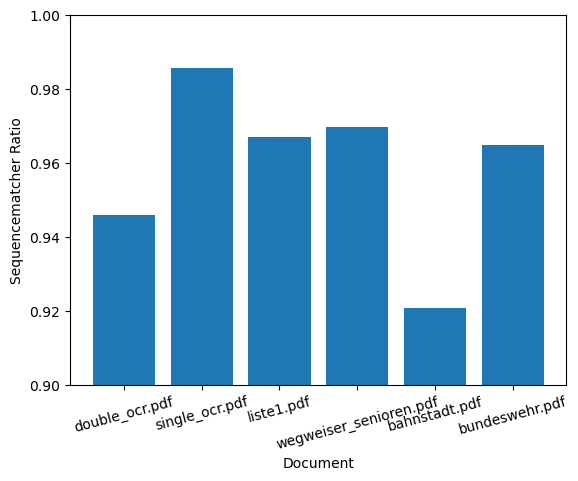

In [138]:
from matplotlib import pyplot as plt
xlabels = [file.split("/")[-1] for file in files]
plt.bar(xlabels, results)
plt.ylim(0.9, 1)
plt.ylabel("Sequencematcher Ratio")
plt.xlabel("Document")
plt.xticks(rotation=15)

In [114]:
data

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOrganisation Liegenschaft Anschrift Ort PLZ E-Mail und URL Telefon Telefax Telefon(IV\nBB)\n\nTelefax(IVB\nB)\n\n1. Panzerdivision Hauptadresse Bümmerste-\nder Tredde\n34\n\nOldenburg 2613\n3\n\n1.PzDivPressestelle@\nBundeswehr.org\nhttp://www.deutsches-\nheer.de\n\n+49 441\n360-2150\n\n+49 441\n360-2159\n\n10. Panzerdivision Hauptadresse Oberdürrba-\ncher Straße\n\nVeits-\nhöchheim\n\n9720\n9\n\n10.PzDivPressestel-\nle@bundeswehr.org\nhttp://www.deutsches-\nheer.de\n\n+49 931\n9707-3160\n\n+49 931\n9707-3169\n\nABC-Abwehrkomman-\ndo der Bundeswehr\n\nHauptadresse Am Eichel-\nberg\n\nBruchsal 7664\n6\n\nABCAbwKdoBwPres-\nse-undOeffentlich-\nkeitsarbeit@bundes-\nwehr.org\nhttp://www.ABCABwK-\ndoBw.streitkraefteba-\nsis.de\n\n+49 7251\n938 2500\n\n+49 7251\n938 2500\n\nAbschlussprüferauf-\nsichtsstelle\n\nHauptadresse Uhlandstra-\nße 88-90\n\nBerlin 1071\n7\n\ninfoapas@apasbafa.b\nund.de\nhttp://www.apasbafa.b\n

In [48]:
parsed_pdf = parser.from_file("1-3-pdf-files/iban/liste1.pdf")
data = parsed_pdf['content']
print(data)

























































IBAN – Länderliste für den internationalen Zahlungsverkehr


IBAN – Länderliste für den internationalen Zahlungsverkehr

Verwenden Sie im grenzüberschreitenden Zahlungsverkehr mit diesen Ländern konsequent IBAN und BIC.

Stand am 1. Januar 2021

1 inkl. Französisch Guyana, Französisch Polynesien, Französisch Süd- und Antarktisgebiete, Guadeloupe, 
Martinique, Mayotte, Neukaledonien, Reunion, St. Pierre und Miquelon, Saint-Barthélemy, Saint-Martin 
(französischer Teil), Wallis und Futuna
2 inkl. Guernsey, Isle of Man, Jersey, Nordirland

EUROPA LÄNDERCODE ANZAHL STELLEN BEISPIEL EINER FIKTIVEN IBAN
Albanien AL 28 AL07 2121 1009 0000 0002 3569 8741

Andorra AD 24 AD02 0001 2030 2003 5910 0100

Belgien BE 16 BE08 5390 0754 7034

Bosnien Herzegowina BA 20 BA09 1290 0794 0102 8494

Bulgarien BG 22 BG00 BNBG 9661 1020 3456 78

Dänemark DK 18 DK00 0040 0440 1162 43

Deutschland DE 22 DE00 7005 1755 0000 0072 29

Estland EE 20 EE08 2200 2

In [49]:
pdfR = page.extract_text().split("\n")

In [50]:
len(pdfR)

54

In [51]:
len(reader.pages[1].extract_text().split("\n"))

30

In [52]:
len(reader.pages)

2

In [64]:
data = [entry for entry in data.split("\n") if len(entry)>0]

In [54]:
pdfR.extend(reader.pages[1].extract_text().split("\n"))

In [55]:
len(pdfR)

84

In [59]:
intersection = set(data).difference(pdfR)

In [60]:
len(intersection)

79

In [62]:
pdfR[0]

'IBAN – Länderliste für den internationalen Zahlungsverkehr'

In [65]:
data[0]

'IBAN – Länderliste für den internationalen Zahlungsverkehr'

In [69]:
counter = 0
for pdfText in pdfR:
    if pdfText in data:
        counter = counter +1
    else: print(pdfText)
counter

Stand am 1. Januar 20211 inkl. Französisch Guyana, Französisch Polynesien, Französisch Süd- und Antarktisgebiete, Guadeloupe, 
2 inkl. Guernsey, Isle of Man, Jersey, NordirlandEUROPA LÄNDERCODE ANZAHL STELLEN BEISPIEL EINER FIKTIVEN IBAN
Frankreich1FR 27 FR04 2004 1010 0505 0001 3M02 606
Grossbritannien2GB 22 GB09 NWBK 6016 1331 9268 19


80

In [70]:
counter = 0
for pdfText in data:
    if pdfText in pdfR:
        counter = counter +1
    else: print(pdfText)
counter

1 inkl. Französisch Guyana, Französisch Polynesien, Französisch Süd- und Antarktisgebiete, Guadeloupe, 
2 inkl. Guernsey, Isle of Man, Jersey, Nordirland
EUROPA LÄNDERCODE ANZAHL STELLEN BEISPIEL EINER FIKTIVEN IBAN
Frankreich1 FR 27 FR04 2004 1010 0505 0001 3M02 606
Grossbritannien2 GB 22 GB09 NWBK 6016 1331 9268 19


82

2. Why is a high quality conversion from PDF to plain text hard? Your answer does not need to be exhaustive
but should outline some of the most important reasons.

There are several open questions while parsing
- should pagen numbers, footers and headers be parsed. How to identify those?
- how to parse formulas, difficulties from Latex generated -> text
- pdf may include texts in images => how to identify those? What to do with the captions
- there is big difference between computer generated pdfs and scanned docs
-- scanned docs don't have searchable text, need to be OCR scanned which doesn't produce 100% correct results.
- How to correctly parse text with several columns or tables


Summary: various shape and method of creations make PDFs hard to convert to plain text

In [ ]:
'